# Aim 

The aim of this code is to use EDA to investigate the use and interaction with technology over time. We pull from HINTS survey data between 2011-2019. The data from earlier years have limited questions about technology: a technology related question that is asked asked in all the surveys is the respondent's usage of internet. Using this question, we seek to validate the hypothesis that more 65+ year old are using tech (the internet in this case) over time. 

In [1]:
#import the relavant packages
import datetime
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm

We define a function for loading the datafile and creating a dataframe

In [2]:
#define a function
def load_file(path):
    local_folder = '.'
    return (pd.read_sas(os.path.join(local_folder, path),encoding='mac_roman'))

In [3]:
#paths of all the files we want to load
path2019 = 'hints5_cycle3_public.sas7bdat'
path2018 = 'hints5_cycle2_public.sas7bdat'
path2017 = 'hints5_cycle1_public.sas7bdat'
path2017fda = 'hints_fda2_public.sas7bdat'
#path2016 = ''
path2015 = 'hints_fda_09052017_public.sas7bdat'
path2014 = 'hints4cycle4_07312020_public.sas7bdat'
path2013 = 'hints4cycle3_07312020_public.sas7bdat'
path2012 = 'hints4cycle2_07312020_public.sas7bdat'
path2011 = 'hints4cycle1_07312020_public.sas7bdat'

In [4]:
#load create dataframe
df2019 = load_file(path2019)
df2018 = load_file(path2018)
df2017 = load_file(path2017)
df2017fda = load_file(path2017fda)
df2015 = load_file(path2015)
df2014 = load_file(path2014)
df2013 = load_file(path2013)
df2012 = load_file(path2012)
df2011 = load_file(path2011)

In [5]:
#Add column to indicate year when data was taken
df2019['Year'] = '2019'
df2018['Year'] = '2018'
df2017['Year'] = '2017'
df2017fda['Year'] = '2017fda'
df2015['Year'] = '2015'
df2014['Year'] = '2014'
df2013['Year'] = '2013'
df2012['Year'] = '2012'
df2011['Year'] = '2011'

In [6]:
#select a subset of columns of interest
subset_var = ['Age', 'UseInternet', 'Year']

df2019_sub = df2019[subset_var]
df2018_sub = df2018[subset_var]
df2017_sub = df2017[subset_var]
df2017fda_sub = df2017fda[subset_var]
df2015_sub =df2015[subset_var]
df2014_sub =df2014[subset_var]
df2013_sub =df2013[subset_var]
df2012_sub =df2012[subset_var]
df2011_sub =df2011[subset_var]

In [7]:
#concatenate the dataframes for ease of analysis
#only include datapoints for age >= 65 to focus on older population

all_years = pd.concat([df2019_sub[df2019_sub['Age'] >= 65], df2018_sub[df2018_sub['Age'] >= 65], df2017_sub[df2017_sub['Age'] >= 65],\
                    df2017fda_sub[df2017fda_sub['Age'] >= 65], df2015_sub[df2015_sub['Age'] >= 65],\
                    df2014_sub[df2014_sub['Age'] >= 65], df2013_sub[df2013_sub['Age'] >= 65],\
                    df2012_sub[df2012_sub['Age'] >= 65], df2011_sub[df2011_sub['Age'] >= 65]], ignore_index=True)


In [8]:
#convert missing data to Nan
all_years['Age'].replace([-9.0,-4.0], np.nan, inplace = True)
all_years['UseInternet'].replace(-9.0, np.nan, inplace = True)
all_years['UseInternet'].replace({1: 'Yes', 2:'No'},inplace = True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

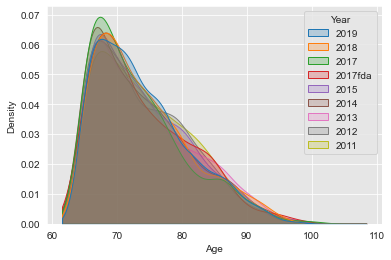

In [26]:
#plot the distribution of age
sns.kdeplot(data=all_years, shade=True, x="Age", hue="Year", common_norm=False, common_grid=True,)

<AxesSubplot:xlabel='Age', ylabel='Density'>

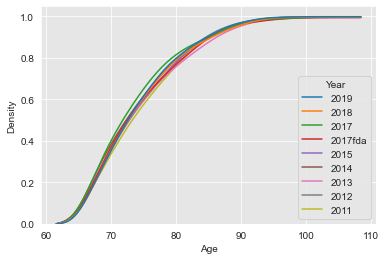

In [27]:
sns.kdeplot(data=all_years, x="Age", hue="Year", cumulative=True, common_norm=False, common_grid=True,)

In [14]:
#express results in crosstab format
cross_tab_allyears = pd.crosstab(all_years["Year"], all_years["UseInternet"], rownames=['Year'], colnames=['UseInternet'], normalize='index')
cross_tab_allyears

UseInternet,No,Yes
Year,,
2011,0.500965,0.499035
2012,0.473140,0.526860
2013,0.506944,0.493056
2014,0.405950,0.594050
2015,0.370629,0.629371
2017,0.377715,0.622285
2017fda,0.340463,0.659537
2018,0.366935,0.633065
2019,0.336603,0.663397


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Use Internet')]

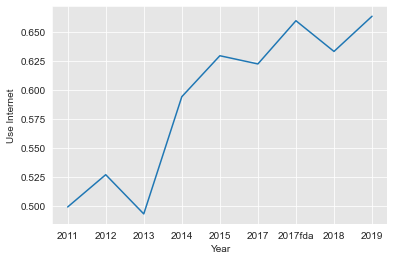

In [15]:
#plot internet usage among 65+ years old adults over time
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.lineplot(data=cross_tab_allyears, x=cross_tab_allyears.index, y='Yes')
ax.set(xlabel="Year", ylabel = "Use Internet")

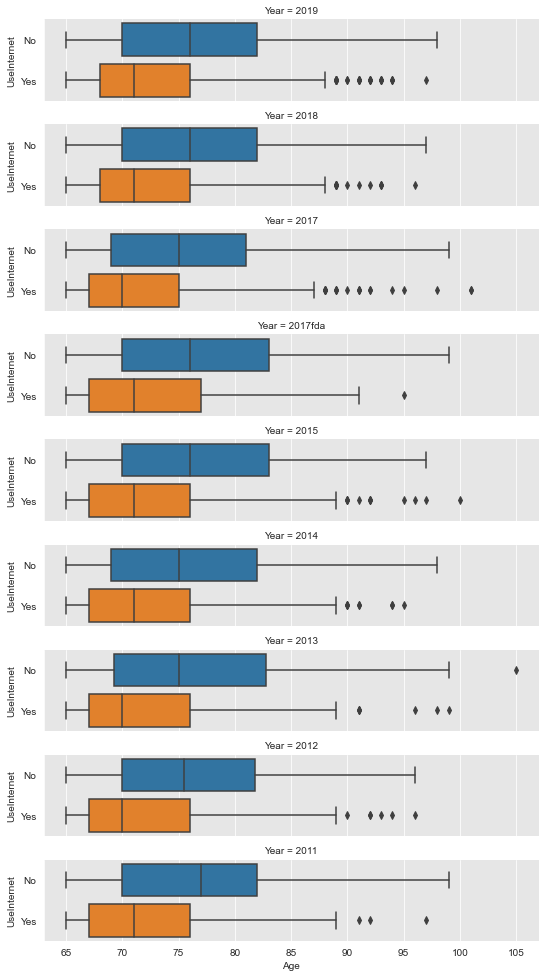

In [16]:
sns.catplot(x="Age", y="UseInternet", row="Year",
                kind="box", orient="h", height=1.5, aspect=5,
                data= all_years)